Training our model to recognize images

In [19]:
# importing libs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [9]:
digits = load_digits() # loading digits

In [10]:
# visualizing the shape of digits
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


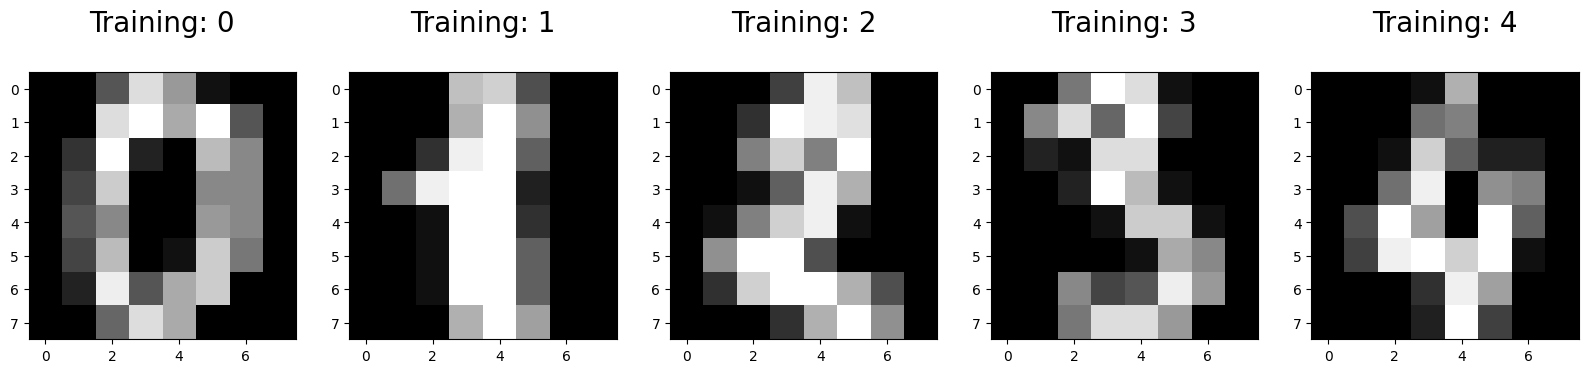

In [13]:
# some of the sample images 
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(digits.data[0 :5], digits.target[0: 5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' %label, fontsize = 20)

In [14]:
# training our logistic regression model (training and test data)
# check for the activation patterns of the pixels: black = 0 ,white = 1
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.23, random_state=2)

In [15]:
print(x_train.shape) # number of entries in train

(1383, 64)


In [16]:
print(y_train.shape)

(1383,)


In [17]:
print(x_test.shape) # number of entries in test

(414, 64)


In [18]:
print(y_test.shape)

(414,)


In [21]:
# logistic regression model
logisticRegr = LogisticRegression() # instance of logistic regression model
logisticRegr.fit(x_train, y_train) # passing the the training dataset

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
print(logisticRegr.predict(x_test[0].reshape(1, -1))) # testing for 1 image
# checks whether the training was successful

[4]


In [25]:
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [27]:
predictions = logisticRegr.predict(x_test)

In [29]:
score = logisticRegr.score(x_test, y_test)
print(score) # 95% accurate

0.9516908212560387


In [30]:
# CM - Confusion Matrix
cm = metrics.confusion_matrix(y_test, predictions) # instance of confusion matrix
print(cm)
# the more the numbers in the diagonal the more the accuracy

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


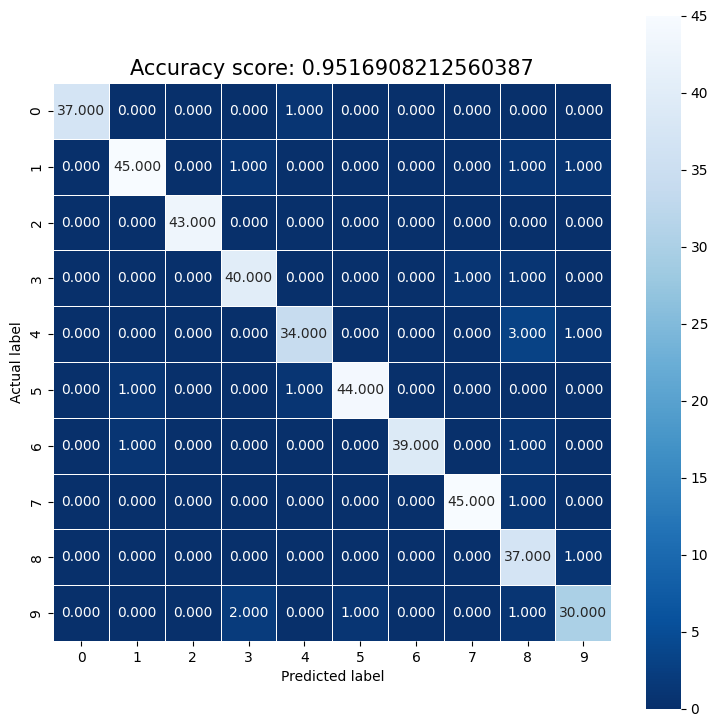

In [35]:
# confusion metrix vusualization
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

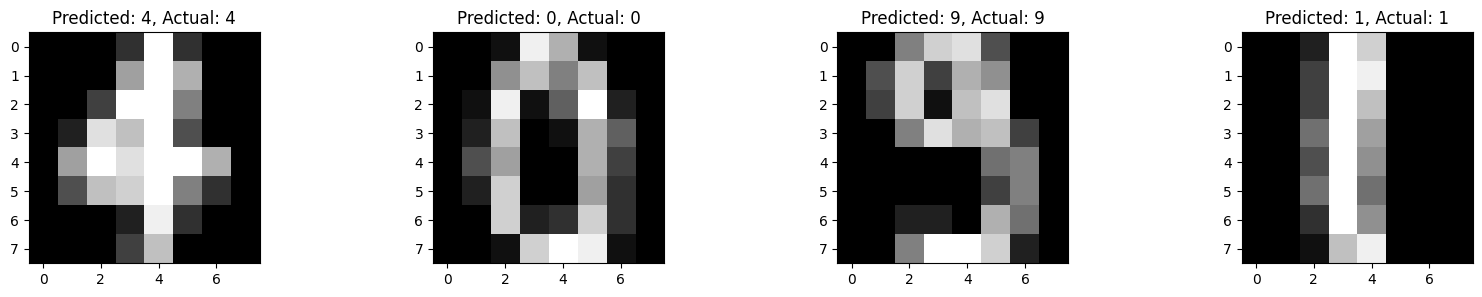

In [40]:
index = 0
classifiedIndex = []
for predict, actual in  zip(predictions, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index +=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)),cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong], fontsize=20) )